<a href="https://colab.research.google.com/github/mzafir/aps/blob/master/EDA_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Node 1 > Degree , eigen_vector_centrality ,Clustering Coefficient , DeepWalk
!pip install networkx pandas numpy scikit-learn


**Steps**
1. Load The Graph Data
2. Generate the Node features ( Understand what each Node does)
3. Check for missing values, any duplicate rows ? (Scale?)
4. Plot historgram for each feature
5. Plot scatter plots between each feature. Any insights?
6. Test Kmeans ( Use Elbow Method to find a good K)
7. Plot graphs visualzing the different clusters


**Understand**
1. Standard scaling? Why do we do it?
2. Elbow Method . Intertia

In [3]:
import networkx as nx

# Load The Graph

G = nx.read_edgelist("facebook_combined.txt",create_using=nx.Graph(),nodetype=int)

print(f"Numer of Edges : {G.number_of_edges()}")
print(f"Number of Nodes : {G.number_of_nodes()}")


Numer of Edges : 88234
Number of Nodes : 4039


In [5]:
# Node Degree
degree_dict = dict(G.degree())

#Clustering Coefficient
clustering_dict = dict(nx.clustering(G))

# EigenVector Centrality
eigen_vector_centrality = nx.eigenvector_centrality(G)


average_neighbor_degree_dict = nx.average_neighbor_degree(G)
degree_centrality_dict = nx.degree_centrality(G)
eccentricity_dict = nx.eccentricity(G)
closeness_centrality_dict = nx.closeness_centrality(G)
betweenness_centrality_dict = nx.betweenness_centrality(G)



In [8]:
import pandas as pd


features_df = pd.DataFrame({
    "Degree" : pd.Series(degree_dict),
    "Clustering_Coefficient" : pd.Series(clustering_dict),
    "EigenVector_Centrality" : pd.Series(eigen_vector_centrality),
    "Average Neighbor Degree": pd.Series(average_neighbor_degree_dict),
    "Degree Centrality"     : pd.Series(degree_centrality_dict),
    "Eccentricity"          : pd.Series(eccentricity_dict),
    "Closeness Centrality"   : pd.Series(closeness_centrality_dict),
    "Betweenness Centrality" : pd.Series(betweenness_centrality_dict),
})



In [9]:
features_df.head()

,Degree,Clustering_Coefficient,EigenVector_Centrality,Average Neighbor Degree,Degree Centrality,Eccentricity,Closeness Centrality,Betweenness Centrality
0,347,0.041962,3.391796e-05,18.959654,0.085934,6,0.353343,1.463059e-01
1,17,0.419118,6.045346e-07,48.235294,0.004210,7,0.261376,2.783274e-06
2,10,0.888889,2.233461e-07,49.900000,0.002476,7,0.261258,7.595021e-08
3,17,0.632353,6.635648e-07,59.764706,0.004210,7,0.261376,1.685066e-06
4,10,0.866667,2.236416e-07,42.600000,0.002476,7,0.261258,1.840332e-07


In [15]:
features_df['Degree'].mean()
features_df['Clustering_Coefficient'].mean()
features_df['Betweenness Centrality'].mean()
features_df['EigenVector_Centrality'].mean()
features_df['Eccentricity '].mean()
features_df['Closeness Centrality'].mean()
features_df['Average Neighbor Degree'].mean()
features_df['Degree Centrality '].mean()



0.010819963503439287

In [16]:
features_df

,Degree,Clustering_Coefficient,EigenVector_Centrality,Average Neighbor Degree,Degree Centrality,Eccentricity,Closeness Centrality,Betweenness Centrality
0,347,0.041962,3.391796e-05,18.959654,0.085934,6,0.353343,1.463059e-01
1,17,0.419118,6.045346e-07,48.235294,0.004210,7,0.261376,2.783274e-06
2,10,0.888889,2.233461e-07,49.900000,0.002476,7,0.261258,7.595021e-08
3,17,0.632353,6.635648e-07,59.764706,0.004210,7,0.261376,1.685066e-06
4,10,0.866667,2.236416e-07,42.600000,0.002476,7,0.261258,1.840332e-07
...,...,...,...,...,...,...,...,...
4034,2,1.000000,2.951270e-10,38.500000,0.000495,8,0.183989,0.000000e+00
4035,1,0.000000,2.912901e-10,59.000000,0.000248,8,0.183980,0.000000e+00
4036,2,1.000000,2.931223e-10,31.500000,0.000495,8,0.183989,0.000000e+00
4037,4,0.666667,2.989233e-10,23.250000,0.000991,8,0.184005,7.156847e-08


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_scaled = scaler.fit_transform(features_df)
features_scaled


array([[ 5.7867806 , -2.62822483, -0.25112646, ..., -0.57194482,
         2.13664867, 12.50667395],
       [-0.50923329, -0.86939407, -0.25331052, ...,  1.04349933,
        -0.40951786, -0.05703562],
       [-0.6427851 ,  1.321339  , -0.25333552, ...,  1.04349933,
        -0.41279521, -0.05726811],
       ...,
       [-0.79541574,  1.839495  , -0.25335014, ...,  2.65894348,
        -2.55205079, -0.05727463],
       [-0.75725808,  0.28502701, -0.25335014, ...,  2.65894348,
        -2.55158655, -0.05726849],
       [-0.66186393, -0.23312899, -0.2533501 , ...,  2.65894348,
        -2.55042558, -0.0572202 ]])

In [18]:
features_scaled = pd.DataFrame(features_scaled,columns=features_df.columns)
features_scaled

,Degree,Clustering_Coefficient,EigenVector_Centrality,Average Neighbor Degree,Degree Centrality,Eccentricity,Closeness Centrality,Betweenness Centrality
0,5.786781,-2.628225,-0.251126,-0.948417,5.786781,-0.571945,2.136649,12.506674
1,-0.509233,-0.869394,-0.253311,-0.627770,-0.509233,1.043499,-0.409518,-0.057036
2,-0.642785,1.321339,-0.253336,-0.609537,-0.642785,1.043499,-0.412795,-0.057268
3,-0.509233,0.125008,-0.253307,-0.501492,-0.509233,1.043499,-0.409518,-0.057130
4,-0.642785,1.217708,-0.253335,-0.689492,-0.642785,1.043499,-0.412795,-0.057259
...,...,...,...,...,...,...,...,...
4034,-0.795416,1.839495,-0.253350,-0.734398,-0.795416,2.658943,-2.552051,-0.057275
4035,-0.814495,-2.823909,-0.253350,-0.509868,-0.814495,2.658943,-2.552283,-0.057275
4036,-0.795416,1.839495,-0.253350,-0.811067,-0.795416,2.658943,-2.552051,-0.057275
4037,-0.757258,0.285027,-0.253350,-0.901426,-0.757258,2.658943,-2.551587,-0.057268


In [20]:
import plotly.express as px


In [25]:
normalized_df = (features_scaled - features_scaled.min()) / (features_scaled.max() - features_scaled.min())


In [26]:
normalized_df.reset_index(inplace=True)
normalized_df.rename(columns={'index': 'Node'}, inplace=True)

In [27]:
fig = px.parallel_coordinates(normalized_df, color='Node', labels={
                "Degree": "Degree",
                "Clustering_Coefficient": "Clustering Coefficient",
                "EigenVector_Centrality": "EigenVector Centrality",
                "Average Neighbor Degree": "Average Neighbor Degree",
                "Degree Centrality": "Degree Centrality",
                "Eccentricity": "Eccentricity",
                "Closeness Centrality": "Closeness Centrality",
                "Betweenness Centrality": "Betweenness Centrality"
            },
            color_continuous_scale=px.colors.diverging.Tealrose,
            color_continuous_midpoint=0.5)


In [28]:
fig.show()

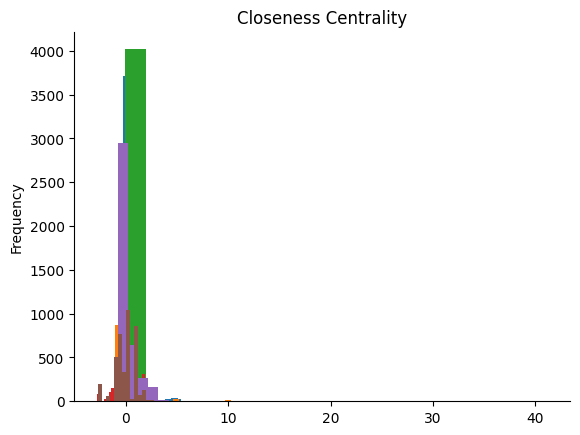

In [29]:
# @title EigenVector_Centrality

from matplotlib import pyplot as plt
features_scaled['EigenVector_Centrality'].plot(kind='hist', bins=20, title='EigenVector_Centrality')
features_scaled['Average Neighbor Degree'].plot(kind='hist', bins=20, title='Average Neighbor Degree')
features_scaled['Betweenness Centrality'].plot(kind='hist', bins=20, title='Betweenness Centrality')
features_scaled['Clustering_Coefficient'].plot(kind='hist', bins=20, title='Clustering_Coefficient')
features_scaled['Degree Centrality '].plot(kind='hist', bins=20, title='Degree Centrality')
features_scaled['Closeness Centrality'].plot(kind='hist', bins=20, title='Closeness Centrality')


plt.gca().spines[['top', 'right',]].set_visible(False)

In [36]:
features_scaled['Degree'].mean()
features_scaled['Average Neighbor Degree'].mean()
features_scaled['Betweenness Centrality'].mean()
features_scaled['Closeness Centrality'].mean()
features_scaled['Degree Centrality '].mean()
features_scaled['Eccentricity '].mean()
features_scaled['EigenVector_Centrality'].mean()

-1.407363675682298e-17

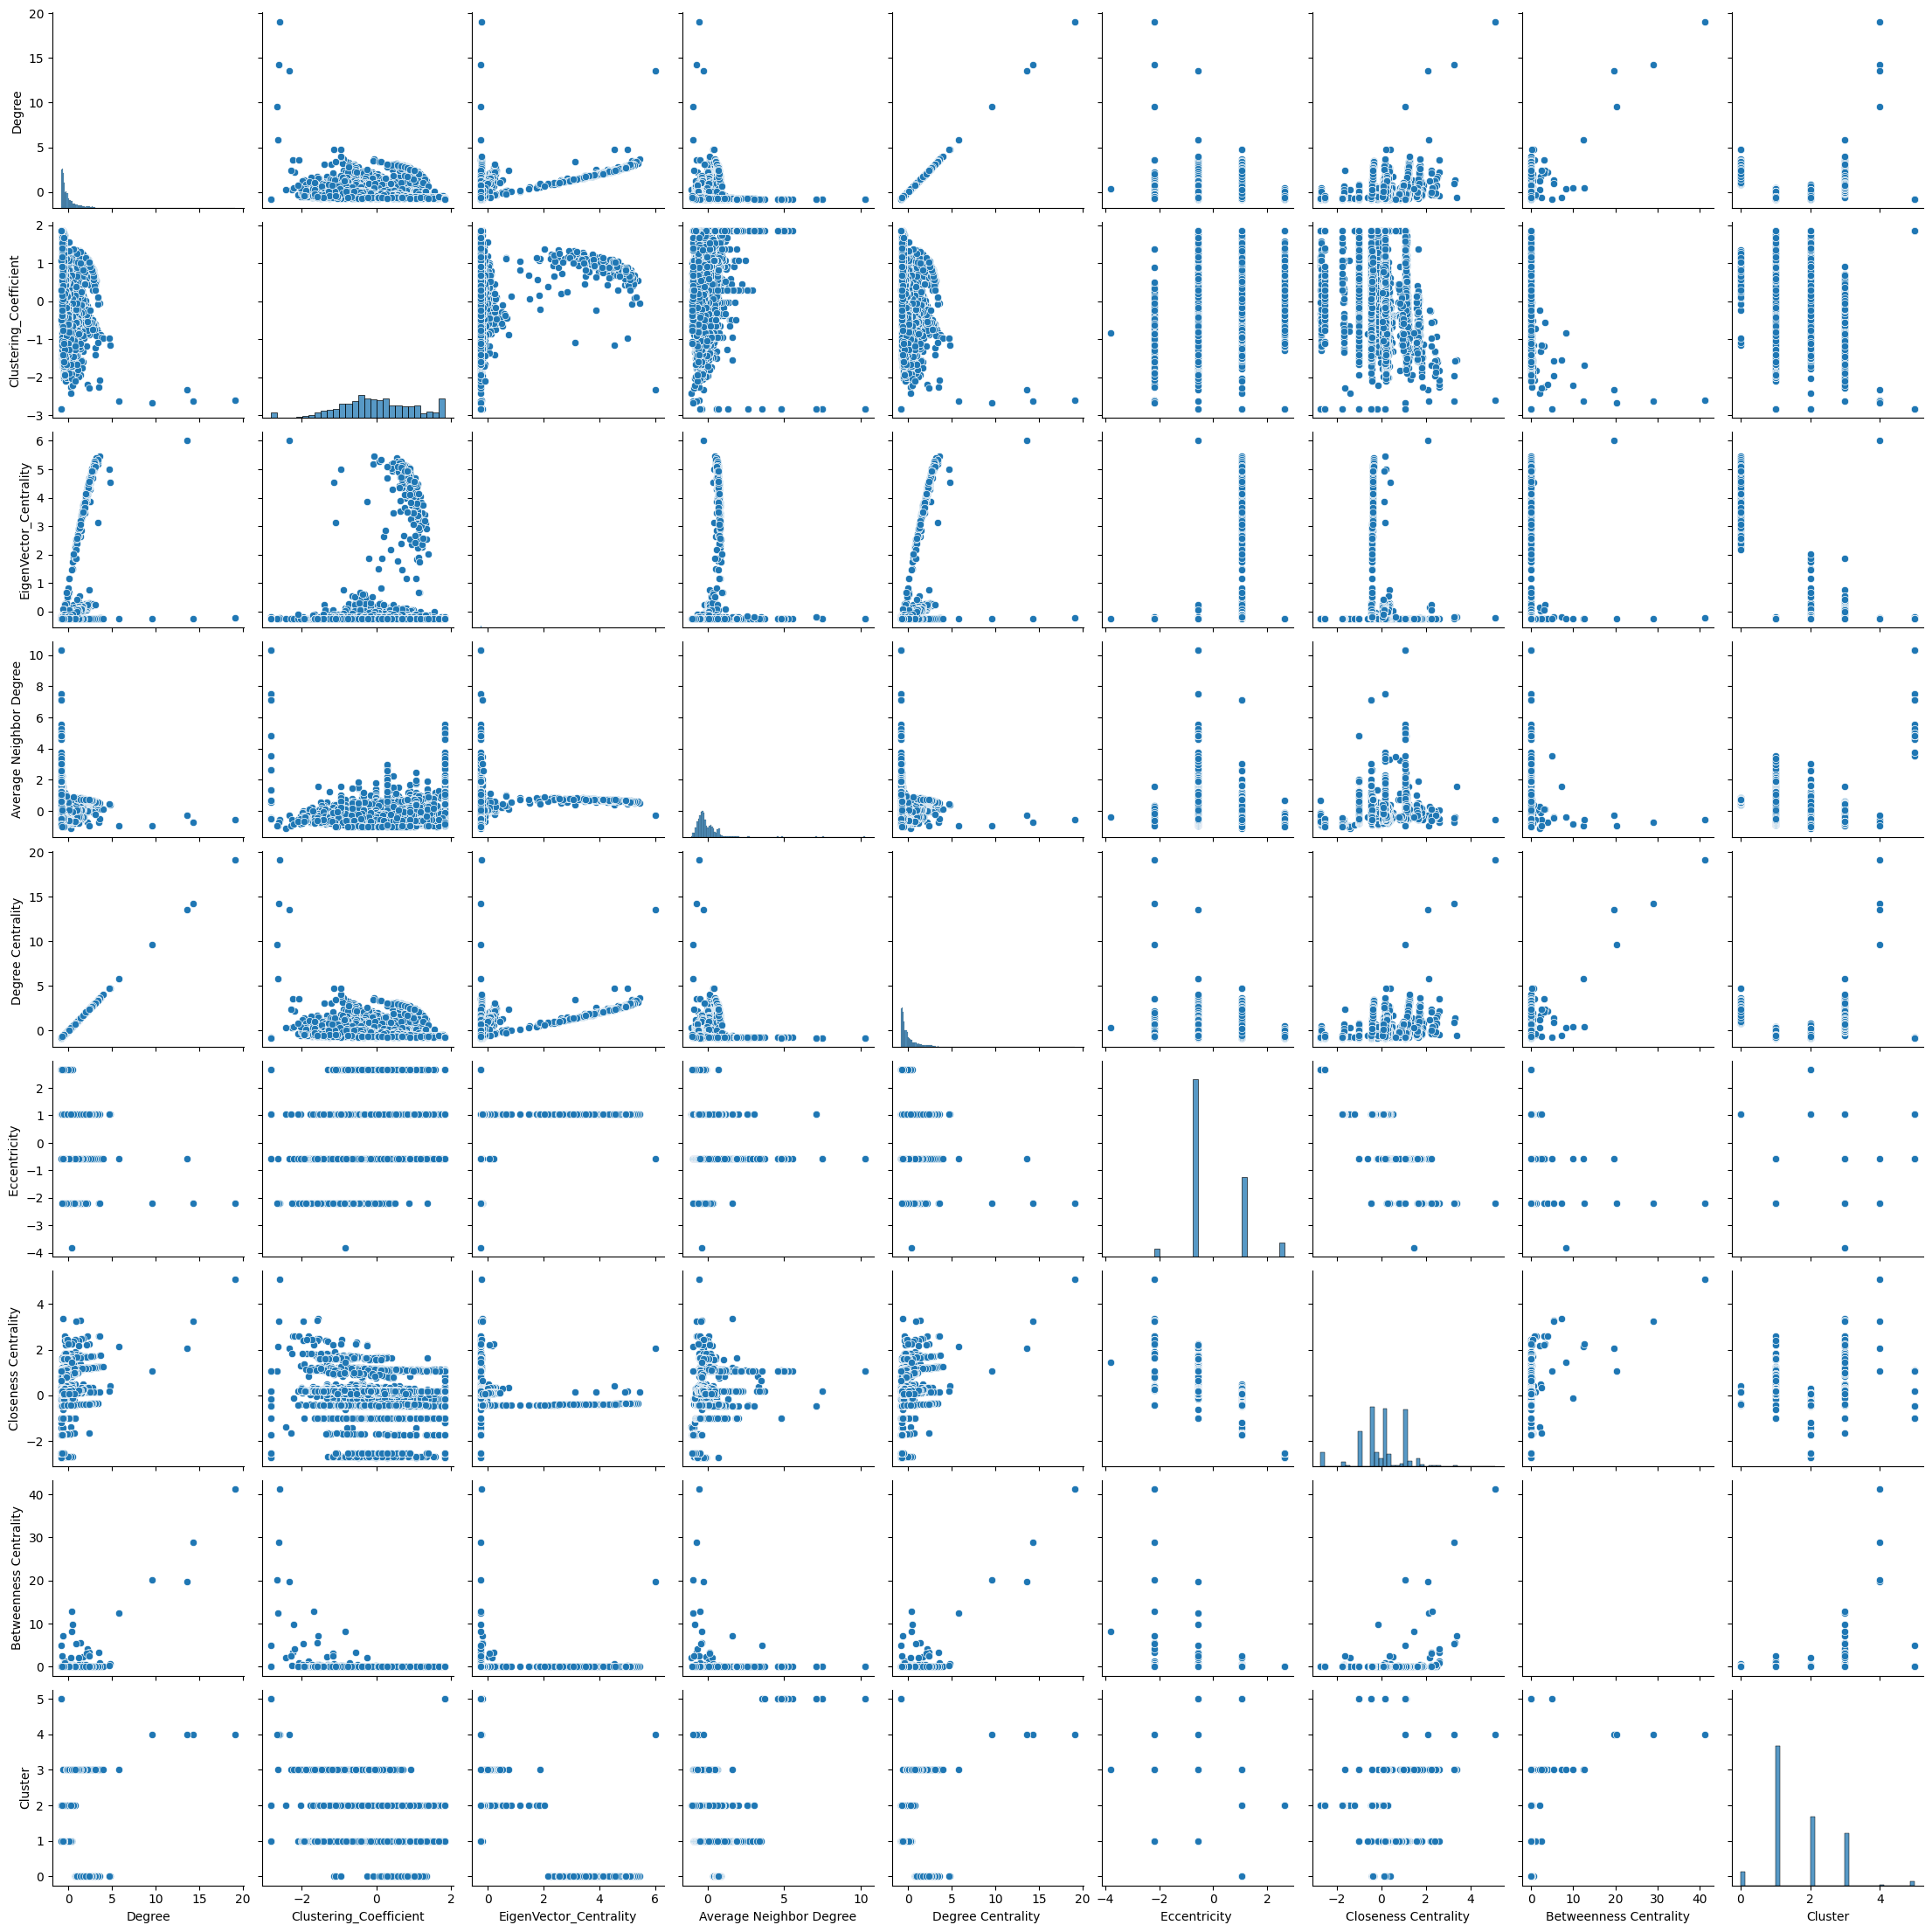

In [37]:
import seaborn as sns

sns.pairplot(features_scaled)



In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(8)

features_df['Cluster'] = kmeans.fit_predict(features_df)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [32]:
features_df['Cluster'].value_counts()

3    1911
4     749
0     705
5     464
1     141
7      42
2      23
6       4
Name: Cluster, dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

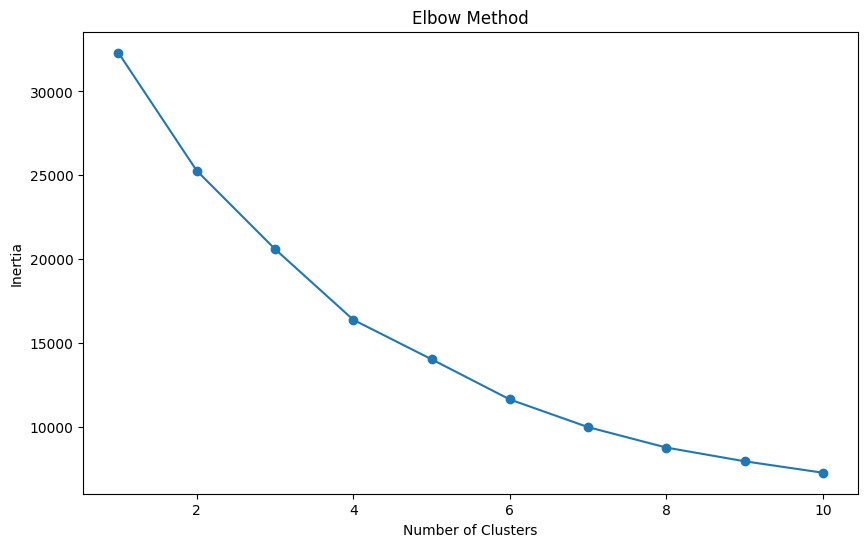

In [33]:
wss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(features_scaled)
    wss.append(kmeans.inertia_)


plt.figure(figsize=(10,6))
plt.plot(range(1,11),wss,marker='o')
plt.title('Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(6)

features_scaled['Cluster'] = kmeans.fit_predict(features_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



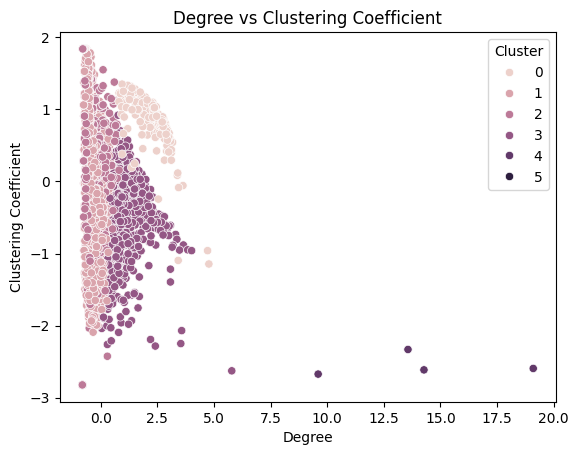

In [35]:
sns.scatterplot(data=features_scaled,x='Degree',y='Clustering_Coefficient',hue="Cluster")
plt.title("Degree vs Clustering Coefficient")
plt.xlabel('Degree')
plt.ylabel('Clustering Coefficient')
plt.legend(title="Cluster")
plt.show()